In [1]:
import sys
sys.path.append('../')

# Parser

In [2]:
import json
from asr.utils.parse_config import ConfigParser

In [3]:
config_file = open('../default_test_config.json')
config_file = json.load(config_file)
config_parser = ConfigParser(config_file)

In [4]:
config_parser.config

{'name': 'default_test_config',
 'overfit': True,
 'n_gpu': 1,
 'preprocessing': {'sr': 22050,
  'spectrogram': {'type': 'MelSpectrogram', 'args': {}}},
 'augmentations': {'wave': [], 'spectrogram': []},
 'arch': {'type': 'QuartzNet', 'args': {'n_feats': 128}},
 'data': {'train': {'batch_size': 20,
   'num_workers': 10,
   'datasets': [{'type': 'LibrispeechDataset',
     'args': {'part': 'train-clean-100',
      'max_audio_length': 10.0,
      'max_text_length': 100,
      'limit': 60}}]},
  'val': {'batch_size': 20,
   'num_workers': 10,
   'datasets': [{'type': 'LibrispeechDataset',
     'args': {'part': 'dev-clean',
      'max_audio_length': 10.0,
      'max_text_length': 100,
      'limit': 60}}]}},
 'optimizer': {'type': 'Adam', 'args': {'lr': 0.0003}},
 'loss': {'type': 'CTCLoss', 'args': {}},
 'metrics': [{'type': 'ArgmaxWERMetric', 'args': {'name': 'WER (argmax)'}},
  {'type': 'ArgmaxCERMetric', 'args': {'name': 'CER (argmax)'}}],
 'lr_scheduler': {'type': 'OneCycleLR',
  'args

In [5]:
config_parser.log_dir

PosixPath('saved/log/default_test_config/1023_173703')

In [6]:
config_parser.save_dir

PosixPath('saved/models/default_test_config/1023_173703')

# librispeech_dataset.py

In [7]:
from asr.datasets.utils import get_dataloaders
from asr.text_encoder.text_encoder import TextEncoder
from asr.text_encoder.text_encoder import get_simple_alphabet
from asr.augmentations import from_configs

In [8]:
text_encoder = TextEncoder(get_simple_alphabet())

In [10]:
dataloaders = get_dataloaders(configs=config_parser, text_encoder=text_encoder)

Loading part train-clean-100


train-clean-100.tar.gz: 6.39GB [11:47, 9.03MB/s]                            
Preparing librispeech folders: train-clean-100: 100%|██████████| 585/585 [00:43<00:00, 13.35it/s]


23175 (81.2%) records are longer then 10.0 seconds. Excluding them.
25337 (88.8%) records are longer then100 characters. Excluding them.
Filtered 25378(88.9%) records  from dataset
Loading part dev-clean


dev-clean.tar.gz: 338MB [00:32, 10.3MB/s]                           
Preparing librispeech folders: dev-clean: 100%|██████████| 97/97 [00:03<00:00, 29.51it/s]

568 (21.0%) records are longer then 10.0 seconds. Excluding them.
1184 (43.8%) records are longer then100 characters. Excluding them.
Filtered 1185(43.8%) records  from dataset


In [11]:
dataloader_train = dataloaders['train']

In [12]:
for batch in dataloader_train:
    break

In [13]:
batch["spectrogram"]

tensor([[[    -inf, -11.2515,  -9.5680,  ..., -15.8060, -15.8219, -15.4307],
         [    -inf, -12.9545, -11.2710,  ..., -22.1431, -20.8087, -16.9119],
         [    -inf, -14.1281, -12.4446,  ..., -21.7607, -20.8946, -16.5983],
         ...,
         [  0.0000,   0.0000,   0.0000,  ...,   0.0000,   0.0000,   0.0000],
         [  0.0000,   0.0000,   0.0000,  ...,   0.0000,   0.0000,   0.0000],
         [  0.0000,   0.0000,   0.0000,  ...,   0.0000,   0.0000,   0.0000]],

        [[    -inf,  -6.1752,  -4.4917,  ...,  -9.5100,  -9.5890,  -9.3318],
         [    -inf,  -6.2192,  -4.5357,  ..., -14.1416, -13.8608, -13.9833],
         [    -inf,  -6.5296,  -4.8461,  ..., -16.5836, -14.4469, -13.8954],
         ...,
         [  0.0000,   0.0000,   0.0000,  ...,   0.0000,   0.0000,   0.0000],
         [  0.0000,   0.0000,   0.0000,  ...,   0.0000,   0.0000,   0.0000],
         [  0.0000,   0.0000,   0.0000,  ...,   0.0000,   0.0000,   0.0000]],

        [[    -inf,  -0.5254,   1.1581,  ...

In [13]:
from asr.logger.utils import plot_spectrogram

In [14]:
plot_spectrogram(batch['spectrogram'][3])

In [15]:
batch

{'audio': [tensor([[0.0024, 0.0020, 0.0011,  ..., 0.0039, 0.0036, 0.0023]]),
  tensor([[0.0030, 0.0034, 0.0030,  ..., 0.0023, 0.0022, 0.0004]]),
  tensor([[ 3.3703e-03,  6.1467e-03,  4.5121e-03,  ...,  1.6496e-05,
           -1.0747e-03, -1.8082e-03]]),
  tensor([[0.0057, 0.0062, 0.0054,  ..., 0.0028, 0.0021, 0.0009]]),
  tensor([[0.0016, 0.0024, 0.0028,  ..., 0.0038, 0.0046, 0.0031]]),
  tensor([[-0.0010, -0.0008, -0.0003,  ..., -0.0011, -0.0012, -0.0006]]),
  tensor([[-0.0358, -0.0389, -0.0341,  ..., -0.0368, -0.0365, -0.0120]]),
  tensor([[0.0007, 0.0008, 0.0006,  ..., 0.0000, 0.0000, 0.0000]]),
  tensor([[-6.5386e-05, -1.3814e-03, -2.3069e-03,  ..., -8.9228e-04,
            3.4048e-04,  3.0951e-04]]),
  tensor([[-1.0015e-03, -1.1310e-03, -1.1547e-03,  ..., -5.4502e-05,
           -2.1051e-04, -4.5887e-05]]),
  tensor([[ 0.0005,  0.0006, -0.0002,  ...,  0.0010,  0.0017,  0.0014]]),
  tensor([[ 0.0004,  0.0027,  0.0037,  ..., -0.0020, -0.0020, -0.0005]]),
  tensor([[2.9216e-28, 2.921

In [16]:
batch["audio"]


[tensor([[9.1553e-05, 1.3428e-03, 3.0518e-04,  ..., 5.1270e-03, 8.7280e-03,
          9.7656e-04]]),
 tensor([[-0.0005, -0.0002, -0.0002,  ...,  0.0023,  0.0020,  0.0016]]),
 tensor([[0.0016, 0.0026, 0.0026,  ..., 0.0033, 0.0040, 0.0041]]),
 tensor([[-9.1553e-05, -1.8311e-04, -1.2207e-04,  ..., -2.4414e-04,
          -9.1553e-05,  3.0518e-05]]),
 tensor([[-0.0067,  0.0083,  0.0089,  ..., -0.0004, -0.0003, -0.0002]]),
 tensor([[ 1.5259e-04,  3.9673e-04,  6.1035e-05,  ..., -2.7466e-04,
          -3.6316e-03, -5.1270e-03]]),
 tensor([[ 0.0027, -0.0027, -0.0039,  ..., -0.0117,  0.0049,  0.0090]]),
 tensor([[0.0031, 0.0032, 0.0033,  ..., 0.0007, 0.0017, 0.0024]]),
 tensor([[ 3.3569e-03,  6.1035e-03,  1.9226e-03,  ..., -8.6670e-03,
           6.1035e-05, -1.9836e-03]]),
 tensor([[-0.0009, -0.0116, -0.0166,  ..., -0.0016, -0.0014, -0.0017]]),
 tensor([[ 2.4414e-04,  1.8311e-04,  9.1553e-05,  ..., -7.6294e-04,
          -7.3242e-04, -6.7139e-04]]),
 tensor([[ 0.0103,  0.0090,  0.0036,  ..., -0

In [21]:

from IPython import display
import torch
import matplotlib.pyplot as plt

In [24]:
def visualize_audio(wav: torch.Tensor, sr: int = 22050):
    # Average all channels
    if wav.dim() == 2:
        # Any to mono audio convertion
        wav = wav.mean(dim=0)
    
    plt.figure(figsize=(16, 5))
    plt.plot(wav, alpha=.7, c='green')
    plt.grid()
    plt.xlabel('Time', size=16)
    plt.ylabel('Amplitude', size=16)
    plt.show()
    
    display.display(display.Audio(wav, rate=sr)) # normalize=False

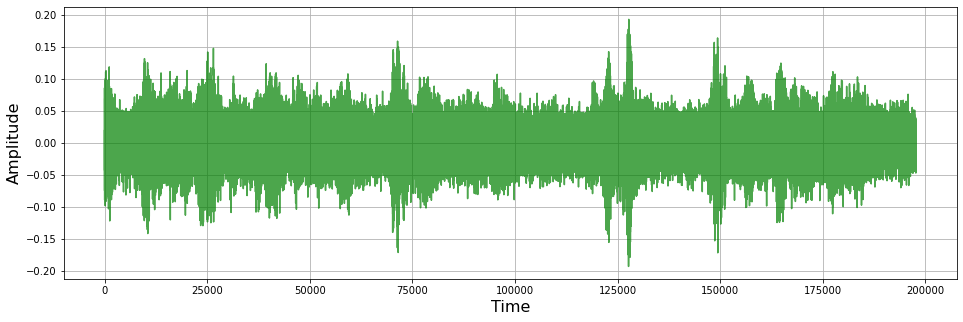

In [25]:
visualize_audio(batch["audio"][1])

In [27]:
display.display(display.Audio(batch["audio"][4], rate=1600))

tensor([-0.0513,  0.0086,  0.0435,  ..., -0.0114, -0.0438,  0.0000])

In [33]:
display.display(display.Audio(batch["audio"][4].squeeze(), rate=20000))

In [14]:
from operator import xor

from torch.utils.data import DataLoader, ConcatDataset

import asr.augmentations
import asr.batch_sampler as batch_sampler_module
import asr.datasets
from asr.text_encoder.text_encoder import TextEncoder
from asr.collate_fn.collate import collate_fn
from asr.utils.parse_config import ConfigParser

In [15]:
for split, params in config_parser["data"].items():
    break

In [16]:
params

{'batch_size': 20,
 'num_workers': 10,
 'datasets': [{'type': 'LibrispeechDataset',
   'args': {'part': 'train-clean-100',
    'max_audio_length': 10.0,
    'max_text_length': 100,
    'limit': 60}}]}

In [17]:
wave_augs, spec_augs = asr.augmentations.from_configs(config_parser)
drop_last = True

In [18]:
spec_augs

In [19]:
wave_augs

In [20]:
datasets = []
for ds in params["datasets"]:
    datasets.append(config_parser.init_obj(ds, asr.datasets, 
                                        text_encoder=text_encoder, config_parser=config_parser,
                                        wave_augs=wave_augs, spec_augs=spec_augs))

23175 (81.2%) records are longer then 10.0 seconds. Excluding them.
25337 (88.8%) records are longer then100 characters. Excluding them.
Filtered 25378(88.9%) records  from dataset


In [21]:
datasets

In [22]:
assert len(datasets)

if len(datasets) > 1:
    dataset = ConcatDataset(datasets)
else:
    dataset = datasets[0]

In [24]:
dataset.index

[{'path': '/Users/khaykingleb/Desktop/QuartzNet/data/datasets/librispeech/train-clean-100/3259/158083/3259-158083-0005.flac',
  'text': 'missus l h hornsby',
  'audio_len': 1.915},
 {'path': '/Users/khaykingleb/Desktop/QuartzNet/data/datasets/librispeech/train-clean-100/5163/18515/5163-18515-0002.flac',
  'text': 'perhaps so said polly',
  'audio_len': 2.195},
 {'path': '/Users/khaykingleb/Desktop/QuartzNet/data/datasets/librispeech/train-clean-100/3259/158083/3259-158083-0080.flac',
  'text': 'and force the hand of the government',
  'audio_len': 2.2},
 {'path': '/Users/khaykingleb/Desktop/QuartzNet/data/datasets/librispeech/train-clean-100/5456/62014/5456-62014-0005.flac',
  'text': "dat shuk an rattled wid ev'y step",
  'audio_len': 2.26},
 {'path': '/Users/khaykingleb/Desktop/QuartzNet/data/datasets/librispeech/train-clean-100/5808/48608/5808-48608-0002.flac',
  'text': 'and carouse with me this night',
  'audio_len': 2.32},
 {'path': '/Users/khaykingleb/Desktop/QuartzNet/data/data

In [25]:
if "batch_size" in params:
    bs = params["batch_size"]
    shuffle = True
    batch_sampler = None

In [26]:
dataset.index[0]

{'path': '/Users/khaykingleb/Desktop/QuartzNet/data/datasets/librispeech/train-clean-100/3259/158083/3259-158083-0005.flac',
 'text': 'missus l h hornsby',
 'audio_len': 1.915}

In [29]:
dataset[2]

{'audio': tensor([[-0.0009, -0.0010, -0.0006,  ...,  0.0008,  0.0010,  0.0007]]),
 'spectrogram': tensor([[    -inf,     -inf,     -inf,  ...,     -inf,     -inf,     -inf],
         [ -9.2673,  -7.0363,  -7.6894,  ...,  -6.9504,  -8.3830, -10.6887],
         [ -7.5838,  -5.3528,  -6.0060,  ...,  -5.2669,  -6.6995,  -9.0052],
         ...,
         [-15.0114, -21.3875, -21.1023,  ..., -21.7099, -21.3822, -15.7701],
         [-14.8710, -20.6580, -20.8012,  ..., -22.1525, -20.9328, -15.8087],
         [-14.7528, -21.1822, -20.6474,  ..., -22.1266, -19.9598, -15.7837]]),
 'duration': 2.2,
 'text': 'and force the hand of the government',
 'text_encoded': tensor([[ 1., 14.,  4.,  0.,  6., 15., 18.,  3.,  5.,  0., 20.,  8.,  5.,  0.,
           8.,  1., 14.,  4.,  0., 15.,  6.,  0., 20.,  8.,  5.,  0.,  7., 15.,
          22.,  5., 18., 14., 13.,  5., 14., 20.]]),
 'audio_path': '/Users/khaykingleb/Desktop/QuartzNet/data/datasets/librispeech/train-clean-100/3259/158083/3259-158083-0080.flac'

In [30]:
data_dict = dataset.index[0]
audio_path = data_dict["path"]

#audio_wave, audio_spec = self.process_wave(audio_wave)


In [31]:
audio_path

'/Users/khaykingleb/Desktop/QuartzNet/data/datasets/librispeech/train-clean-100/3259/158083/3259-158083-0005.flac'

In [42]:
import torchaudio
import torch

In [45]:
def load_audio(path):
        audio_tensor, sr = torchaudio.load(path)
        audio_tensor = audio_tensor[0:1, :]  # remove all channels but the first
        target_sr = 16000
        if sr != target_sr:
            audio_tensor = torchaudio.functional.resample(audio_tensor, sr, target_sr)
        return audio_tensor

In [46]:
audio_wave = load_audio(audio_path)

In [47]:
audio_wave

tensor([[-0.0002, -0.0004, -0.0008,  ...,  0.0006,  0.0010,  0.0010]])

In [70]:
def process_wave(audio_tensor_wave):
    with torch.no_grad():

        if wave_augs is not None:
            audio_tensor_wave = wave_augs(audio_tensor_wave)
            print("hi")

        wave2spec = config_parser.init_obj(config_parser["preprocessing"]["spectrogram"],
                                           torchaudio.transforms)
        
        audio_tensor_spec = torch.log(wave2spec(audio_tensor_wave) + 1e-16).squeeze()

        if spec_augs is not None:
            print("hi")
            audio_tensor_spec = spec_augs(audio_tensor_spec)

        return audio_tensor_wave, audio_tensor_spec

In [71]:
audio_wave, audio_spec = process_wave(audio_wave)

In [72]:
audio_spec

tensor([[-36.8414, -36.8414, -36.8414,  ..., -36.8414, -36.8414, -36.8414],
        [ -5.7592,  -7.8414,  -6.6104,  ...,  -6.4693,  -7.5815, -10.5428],
        [ -4.0757,  -6.1579,  -4.9269,  ...,  -4.7858,  -5.8980,  -8.8593],
        ...,
        [-13.5733, -11.8545, -11.5816,  ..., -11.5830, -11.1531, -11.2270],
        [-13.8403, -11.0666, -11.5044,  ..., -11.5245, -12.8638, -12.5875],
        [-12.4078, -11.2628, -12.8470,  ..., -10.6966, -12.5675, -11.9961]])

In [68]:
a = torchaudio.transforms.MelSpectrogram()

In [69]:
a(audio_wave)

tensor([[[0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
          0.0000e+00, 0.0000e+00],
         [3.1538e-03, 3.9312e-04, 1.3463e-03,  ..., 1.5503e-03,
          5.0979e-04, 2.6384e-05],
         [1.6981e-02, 2.1167e-03, 7.2486e-03,  ..., 8.3473e-03,
          2.7448e-03, 1.4206e-04],
         ...,
         [1.2741e-06, 7.1064e-06, 9.3359e-06,  ..., 9.3232e-06,
          1.4331e-05, 1.3310e-05],
         [9.7552e-07, 1.5626e-05, 1.0085e-05,  ..., 9.8853e-06,
          2.5902e-06, 3.4145e-06],
         [4.0866e-06, 1.2842e-05, 2.6339e-06,  ..., 2.2621e-05,
          3.4833e-06, 6.1683e-06]]])